In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from recognizer.raw_samples import load_raw_suite
import recognizer.samples
recognizer.samples.USE_SLERP = False
from sklearn.model_selection import train_test_split
import models.ML as ml
import models.utils as models_utils
import seaborn as sns
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

path = "data/unpacked"
path_train = "data/train"
path_test = "data/test"

window = 256
resample_f = 100


# train_test_split -> bad idea -> overfitting
# --------------------------------------------------

# suite = load_raw_suite(path)
# suite.resample(resample_f)
# print(suite)

# X, y = ml.load_data(suite, window_size=window)
# print(f'X: {X.shape}')
# print(f'y: {y.shape}')

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


# train and test 
# --------------------------------------------------

train_suite = load_raw_suite(path_train)
test_suite = load_raw_suite(path_test)
train_suite.resample(resample_f)
test_suite.resample(resample_f)
print(train_suite)
print(test_suite)

X_train, y_train = ml.load_data(train_suite)
X_test, y_test = ml.load_data(test_suite)



data/train: length 95, resample to 100Hz
data/test: length 29, resample to 100Hz
Loading data...
Shuffling data...
Done

Done

Loading data...
Shuffling data...
Done

Done



In [2]:
labels = models_utils.numbers_to_labels(y_train)

# Stochastic Neighbor Embedding (t-SNE) - is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data. 
# Non-linear dimensionality reduction means that the algorithm allows us to separate data that cannot be separated by a straight line. 
# t-SNE preserves the relationships between data points in a lower-dimensional space, making it quite a good algorithm for visualizing complex high-dimensional data. 

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
tsne_results = tsne.fit_transform(X_train)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 111706 samples in 0.030s...
[t-SNE] Computed neighbors for 111706 samples in 38.786s...
[t-SNE] Computed conditional probabilities for sample 1000 / 111706
[t-SNE] Computed conditional probabilities for sample 2000 / 111706
[t-SNE] Computed conditional probabilities for sample 3000 / 111706
[t-SNE] Computed conditional probabilities for sample 4000 / 111706
[t-SNE] Computed conditional probabilities for sample 5000 / 111706
[t-SNE] Computed conditional probabilities for sample 6000 / 111706
[t-SNE] Computed conditional probabilities for sample 7000 / 111706
[t-SNE] Computed conditional probabilities for sample 8000 / 111706
[t-SNE] Computed conditional probabilities for sample 9000 / 111706
[t-SNE] Computed conditional probabilities for sample 10000 / 111706
[t-SNE] Computed conditional probabilities for sample 11000 / 111706
[t-SNE] Computed conditional probabilities for sample 12000 / 111706
[t-SNE] Computed conditional proba

<Axes: xlabel='tsne-2d-0', ylabel='tsne-2d-1'>

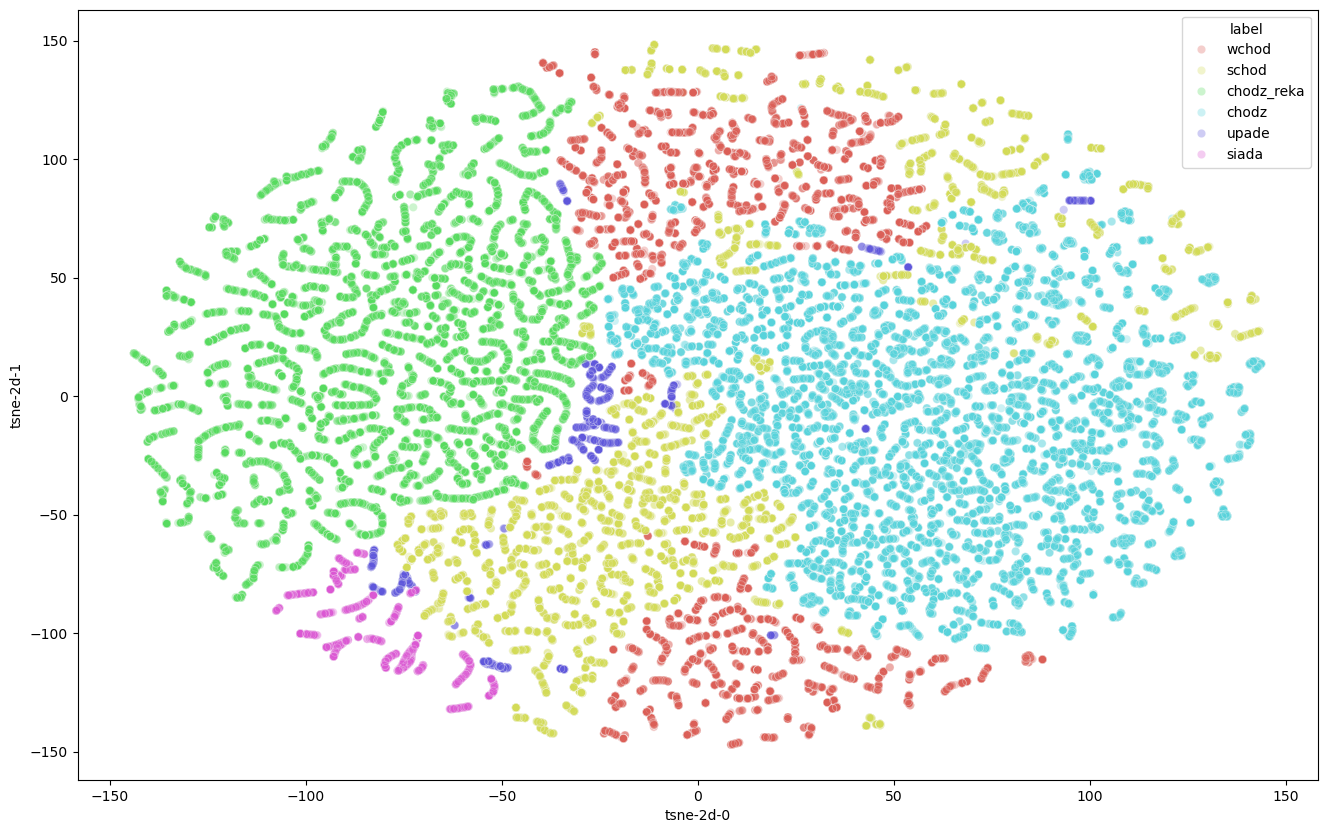

In [3]:
df_subset = pd.DataFrame({
    'tsne-2d-0': tsne_results[:,0],
    'tsne-2d-1': tsne_results[:,1],
    'label': labels['activity'],
})

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-0", y="tsne-2d-1",
    hue="label",
    palette=sns.color_palette("hls", 6),
    data=df_subset,
    legend="full",
    alpha=0.3
)

------------------------------
| Train and test data shapes |
------------------------------
X_train shape:  (111706, 64)
y_train shape:  (111706,)
X_test shape:  (37080, 64)
y_test shape:  (37080,)


----------------------------
| Train / test split [%] |
----------------------------


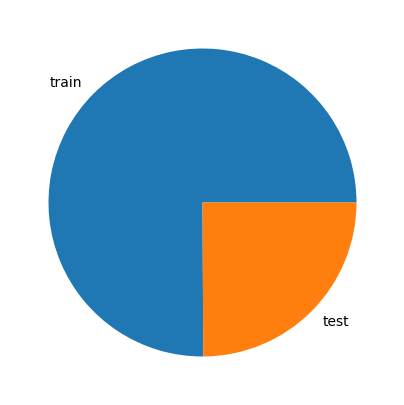



----------------------------
| Class distribution train |
----------------------------
chodz         40145
chodz_reka    29928
schod         20638
wchod         16237
upade          2437
siada          2321
Name: count, dtype: int64


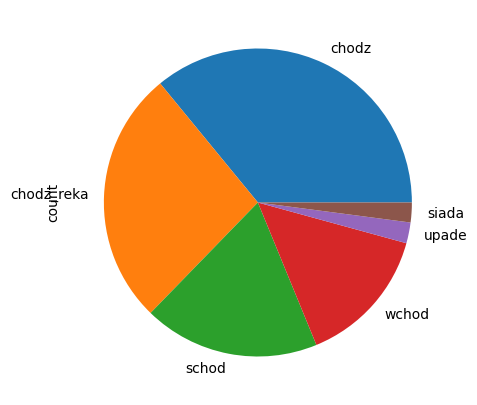



---------------------------
| Class distribution test |
---------------------------
chodz_reka    14150
chodz          7612
wchod          6324
schod          5965
upade          1663
siada          1366
Name: count, dtype: int64


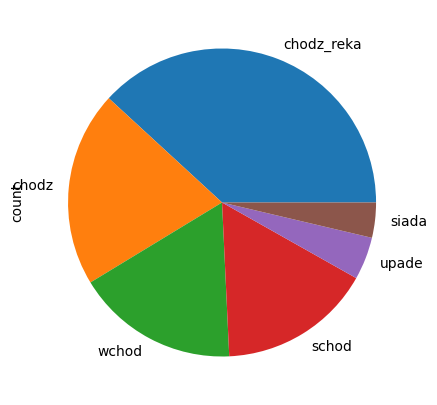

In [ ]:
ml.train_test_info(X_train, y_train, X_test, y_test)

training the model..
Done 

Predicting test data
Done 

------------
| Accuracy |
------------
85.21

--------------------
| Confusion Matrix |
--------------------
Normalized confusion matrix
[[0.83657383 0.         0.16027325 0.00315292 0.         0.        ]
 [0.01279152 0.97681979 0.         0.         0.         0.01038869]
 [0.21521189 0.         0.61464263 0.08791904 0.08222644 0.        ]
 [0.01592624 0.         0.00184409 0.91265717 0.         0.06957251]
 [0.         0.         0.         0.16105417 0.7181552  0.12079063]
 [0.0733614  0.         0.02285027 0.07456404 0.17077571 0.65844859]]


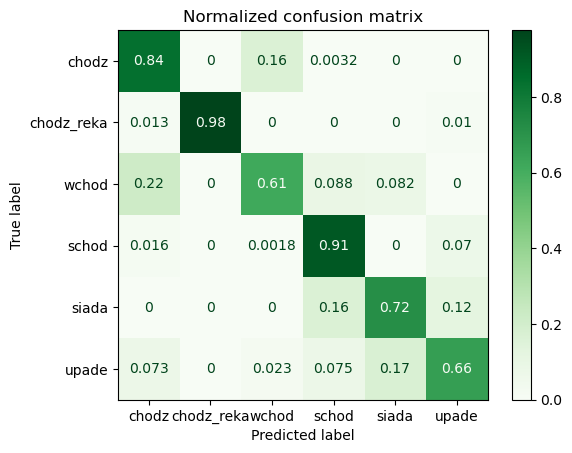

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      7612
           1       1.00      0.98      0.99     14150
           2       0.75      0.61      0.68      6324
           3       0.85      0.91      0.88      5965
           4       0.55      0.72      0.62      1366
           5       0.60      0.66      0.63      1663

    accuracy                           0.85     37080
   macro avg       0.76      0.79      0.77     37080
weighted avg       0.86      0.85      0.85     37080



In [ ]:
from sklearn import linear_model

# Create logistic regression
logistic = linear_model.LogisticRegression()
logistic_result = ml.perform_model(logistic, X_train, y_train, X_test, y_test, class_labels=models_utils.labels)


training the model..
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Done 

Predicting test data
Done 

------------
| Accuracy |
------------
74.54

--------------------
| Confusion Matrix |
--------------------
Normalized confusion matrix
[[0.04098791 0.         0.78625854 0.17275355 0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.09187223 0.         0.81704617 0.09108159 0.         0.        ]
 [0.0357083  0.00268231 0.02464376 0.93294216 0.00251467 0.0015088 ]
 [0.         0.         0.         0.         0.8477306  0.1522694 ]
 [0.00901984 0.         0.07215875 0.06614552 0.07937462 0.77330126]]


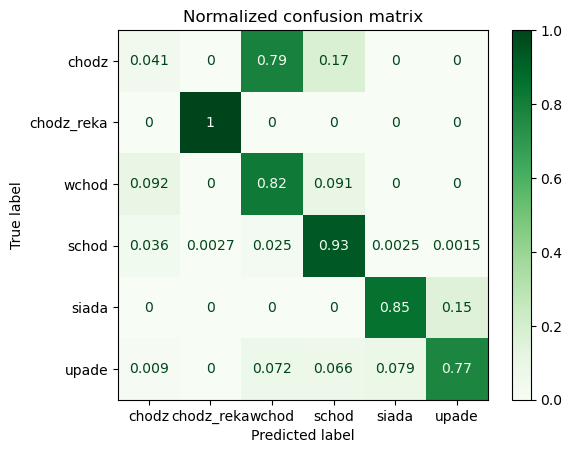

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.28      0.04      0.07      7612
           1       1.00      1.00      1.00     14150
           2       0.45      0.82      0.58      6324
           3       0.74      0.93      0.82      5965
           4       0.89      0.85      0.87      1366
           5       0.86      0.77      0.81      1663

    accuracy                           0.75     37080
   macro avg       0.70      0.74      0.69     37080
weighted avg       0.70      0.75      0.70     37080



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#knn
# start Grid search 
parameters = {'n_neighbors': [1, 10, 11, 20, 30]}
clf_knn = KNeighborsClassifier(n_neighbors=6)

knn_grid = GridSearchCV(clf_knn, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
knn_grid_results = ml.perform_model(knn_grid, X_train, y_train, X_test, y_test, class_labels=models_utils.labels)

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Done 

Predicting test data
Done 

------------
| Accuracy |
------------
89.76

--------------------
| Confusion Matrix |
--------------------
Normalized confusion matrix
[[0.96860221 0.         0.03139779 0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.08475648 0.         0.61242884 0.29996837 0.0028463  0.        ]
 [0.01156748 0.         0.00419111 0.94752724 0.         0.03671417]
 [0.         0.         0.         0.02928258 0.72401171 0.24670571]
 [0.01383043 0.         0.09380637 0.12567649 0.01803969 0.74864702]]


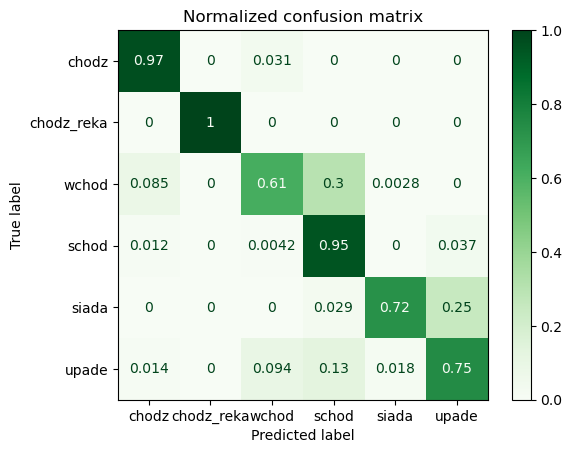

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7612
           1       1.00      1.00      1.00     14150
           2       0.90      0.61      0.73      6324
           3       0.72      0.95      0.82      5965
           4       0.95      0.72      0.82      1366
           5       0.69      0.75      0.72      1663

    accuracy                           0.90     37080
   macro avg       0.87      0.83      0.84     37080
weighted avg       0.91      0.90      0.89     37080



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#svm
# start Grid search
parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}
clf_svm = SVC()

svm_grid = GridSearchCV(clf_svm, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
svm_grid_results = ml.perform_model(svm_grid, X_train, y_train, X_test, y_test, class_labels=models_utils.labels)


training the model..
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Done 

Predicting test data
Done 

------------
| Accuracy |
------------
63.23

--------------------
| Confusion Matrix |
--------------------
Normalized confusion matrix
[[0.02456647 0.         0.88504992 0.0903836  0.         0.        ]
 [0.         0.95823322 0.         0.00176678 0.00219081 0.03780919]
 [0.12333966 0.         0.53795066 0.10215054 0.15417457 0.08238457]
 [0.01659681 0.         0.0883487  0.75373009 0.03772003 0.10360436]
 [0.00805271 0.         0.         0.05417277 0.72401171 0.21376281]
 [0.05592303 0.10883945 0.07276007 0.17257968 0.10102225 0.48887553]]


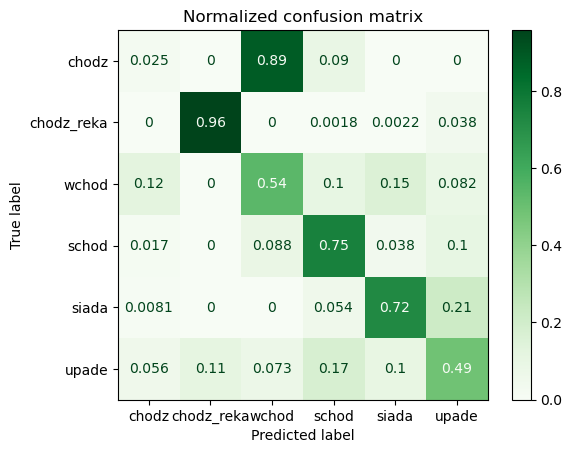

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.16      0.02      0.04      7612
           1       0.99      0.96      0.97     14150
           2       0.32      0.54      0.40      6324
           3       0.72      0.75      0.74      5965
           4       0.41      0.72      0.53      1366
           5       0.29      0.49      0.37      1663

    accuracy                           0.63     37080
   macro avg       0.48      0.58      0.51     37080
weighted avg       0.61      0.63      0.60     37080



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#dt
# start Grid search
parameters = {'max_depth': [10, 20, 30]}
clf_dt = DecisionTreeClassifier()

dt_grid = GridSearchCV(clf_dt, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
dt_grid_results = ml.perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=models_utils.labels)

training the model..
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Done 

Predicting test data
Done 

------------
| Accuracy |
------------
67.46

--------------------
| Confusion Matrix |
--------------------
Normalized confusion matrix
[[0.05662112 0.         0.94337888 0.         0.         0.        ]
 [0.         0.96657244 0.         0.         0.         0.03342756]
 [0.02324478 0.         0.43232132 0.5444339  0.         0.        ]
 [0.01039396 0.         0.00519698 0.97435038 0.         0.01005868]
 [0.         0.         0.         0.         0.80966325 0.19033675]
 [0.         0.07035478 0.06133494 0.04509922 0.06794949 0.75526158]]


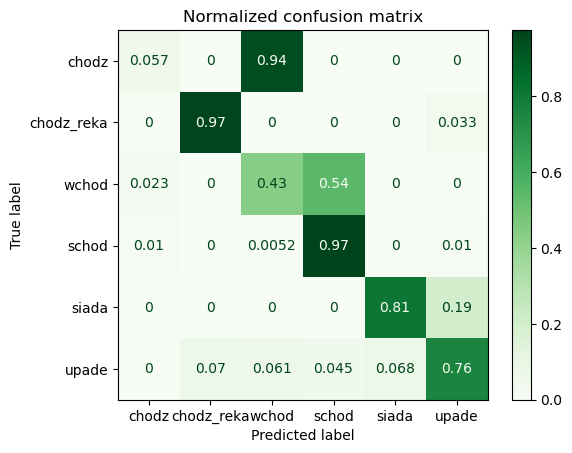

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.67      0.06      0.10      7612
           1       0.99      0.97      0.98     14150
           2       0.27      0.43      0.33      6324
           3       0.62      0.97      0.76      5965
           4       0.91      0.81      0.86      1366
           5       0.61      0.76      0.68      1663

    accuracy                           0.67     37080
   macro avg       0.68      0.67      0.62     37080
weighted avg       0.72      0.67      0.64     37080



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#rf
# start Grid search
parameters = {'max_depth': [10, 20, 30], 'n_estimators': [20, 50, 100]}
clf_rf = RandomForestClassifier()

rf_grid = GridSearchCV(clf_rf, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
rf_grid_results = ml.perform_model(rf_grid, X_train, y_train, X_test, y_test, class_labels=models_utils.labels)

In [ ]:
print(rf_grid.cv_results_.keys())
print(rf_grid.cv_results_['mean_test_score'])
print(rf_grid.cv_results_['params'])

def get_best_params(results):
    besti = np.argmax(results['mean_test_score'])
    best_accu = results['mean_test_score'][besti]
    best_param = results['params'][besti]
    return best_accu, best_param

get_best_params(rf_grid.cv_results_)

# print(rf_grid_results['classification_report'])

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
[0.99985677 0.9999821  0.99997314 0.99999105 0.99999105 0.99999105
 0.99999105 0.99999105 1.        ]
[{'max_depth': 10, 'n_estimators': 20}, {'max_depth': 10, 'n_estimators': 50}, {'max_depth': 10, 'n_estimators': 100}, {'max_depth': 20, 'n_estimators': 20}, {'max_depth': 20, 'n_estimators': 50}, {'max_depth': 20, 'n_estimators': 100}, {'max_depth': 30, 'n_estimators': 20}, {'max_depth': 30, 'n_estimators': 50}, {'max_depth': 30, 'n_estimators': 100}]


(1.0, {'max_depth': 30, 'n_estimators': 100})